# OrderImaging intent Phrase Structures Analysis

* By Adam Lang
* Demo of work I completed while at Nuance/Microsoft in 2022-2023.

- This notebook was used for a phrase structure analysis of the "OrderImaging" radiology ontology and natural language understanding model.
- I used Python in this notebook.
- This is what I did:

1. I had a large file of tagged string patterns. For example an NLU phrase will have a BODY_REGION, MODALITY, and VIEW_STRING in the phrase.
2. I used this code to loop through each row and pull specific entities I was looking for out into a new column.
3. Then I tagged the entities with a 1 letter code. For example "MODALITY" became "M".
4. Then I transformed the entities that were tagged into the original ordered pattern.
5. Then I counted the patterns to see how many tagged entities were present, so if there was "MBC" that is 3.
6. Final Analysis of outcomes.
7. Exported 2 separate dataframes with results to CSV files.

### pip install then import necessary libraries into VS Code jupyter notebook

In [36]:
# install libraries
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 32.6 MB/s eta 0:00:00
     ---------------------------------------- 187.6/187.6 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 45.5 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 6.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pattern Recognition Task

### 1. Data Preprocessing:
Load dataset and create a new column to store the extracted patterns.

In [9]:
import pandas as pd

# Load your dataset
data = pd.read_excel('dmvaOrderImaging_Phrase_Structures_w_out_values.xlsx')



In [10]:
#window into the data with the head() function
data.head()

,Phrase_Samples
0,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
1,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
2,"ORDER_ACTION, MODALITY, PRIORITY"
3,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
4,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGION"


In [11]:
#describe dataset
data.describe()

,Phrase_Samples
count,2220
unique,2220
top,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
freq,1


### Create test dataframe

In [16]:
#copy existing dataframe
data_test = data.copy()

#head
data_test.head()

,Phrase_Samples
0,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
1,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
2,"ORDER_ACTION, MODALITY, PRIORITY"
3,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
4,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGION"


In [17]:
#Create sample of data_test dataframe for analysis
data_test = data_test[0:10]


#head
data_test.head(11)

,Phrase_Samples
0,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
1,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
2,"ORDER_ACTION, MODALITY, PRIORITY"
3,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M..."
4,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGION"
5,"ORDER_ACTION, PRIORITY, MODALITY, FOR_SECRET, ..."
6,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE..."
7,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE..."
8,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGIO..."
9,"ORDER_ACTION, A_AN_SECRET, PRIORITY, MODALITY,..."


### 2. Pattern Extraction:
In this code, I wrote a function "extract_ordered_entities" that extracts the entities based on the predefined order and joins them in the order they appear within the row. Then, the transform_entities_to_pattern function transforms the ordered entities into the corresponding pattern based on the desired mapping structure.

This way, regardless of the order in which the entities appear in each row, the code will maintain and utilize that order for further processing.

In [18]:
#import libraries
import re
import pandas as pd

In [19]:
#entity order established as a list
entity_order = ['MODALITY', 'BODY_REGION', 'PRIORITY','VIEW_STRING','VIEW_POSITION','CONTRAST_MODIFIER']

In [20]:
#define function to extract ordered entities from dataframe row
def extract_ordered_entities(row):
    entities = re.findall(r'\b(' + '|'.join(entity_order) + r')\b', row)
    return ' '.join(entities)  # Join the extracted entities in the order they appear

In [21]:
#review columns in the dataframe
data_test.columns

Index(['Phrase_Samples'], dtype='object')

In [22]:
#extract ordered entities from text column
data['ordered_entities'] = data['Phrase_Samples'].apply(extract_ordered_entities)

In [23]:
#view outcome
data.head(10)

,Phrase_Samples,ordered_entities
0,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION CONTRAST_MODIFIER
1,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION
2,"ORDER_ACTION, MODALITY, PRIORITY",MODALITY PRIORITY
3,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION PRIORITY
4,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGION",MODALITY BODY_REGION
5,"ORDER_ACTION, PRIORITY, MODALITY, FOR_SECRET, ...",PRIORITY MODALITY BODY_REGION
6,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE...",MODALITY BODY_REGION
7,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE...",MODALITY BODY_REGION PRIORITY
8,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGIO...",MODALITY BODY_REGION PRIORITY
9,"ORDER_ACTION, A_AN_SECRET, PRIORITY, MODALITY,...",PRIORITY MODALITY BODY_REGION


Summary: Above we can see the column "Phrase_Samples" was looped over and the entities that I wanted to extract were pulled into a new column "ordered_entities."

### 3. Entity to Pattern Transformation:
Create dictionary to map entities to desired pattern symbols. Then, use the str.translate() method to transform the extracted pattern.

In [24]:
# This dictionary maps entities to their corresponding pattern symbols
entity_to_pattern = {
    'MODALITY': 'M',
    'BODY_REGION': 'B',
    'CONTRAST_MODIFIER': 'C',
	'PRIORITY': 'Pr',
	'VIEW_POSITION': 'P',
	'VIEW_STRING':'V'
}

### 4. Transform entities to original pattern

In [25]:
#define function to transform entities to original string pattern
def transform_entities_to_pattern(ordered_entities):
    pattern = ''.join([entity_to_pattern[entity] for entity in ordered_entities.split()])
    return pattern

In [26]:
#add ordered_entities column to data
data['transformed_pattern'] = data['ordered_entities'].apply(transform_entities_to_pattern)

### 5. Count patterns

In [27]:
# Define a function to count the number of entity to pattern letters in a string
def count_entity_patterns(s):
    return sum(1 for c in s if c in entity_to_pattern.values())


In [28]:
# Apply the function to each row in the dataframe
data["entity_pattern_count"] = data["transformed_pattern"].apply(lambda x: count_entity_patterns(x))

In [29]:
#view outcome
data.head(10)

,Phrase_Samples,ordered_entities,transformed_pattern,entity_pattern_count
0,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION CONTRAST_MODIFIER,MBC,3
1,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION,MB,2
2,"ORDER_ACTION, MODALITY, PRIORITY",MODALITY PRIORITY,MPr,2
3,"ORDER_ACTION, ORDER_TYPE_SECRET, FOR_SECRET, M...",MODALITY BODY_REGION PRIORITY,MBPr,3
4,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGION",MODALITY BODY_REGION,MB,2
5,"ORDER_ACTION, PRIORITY, MODALITY, FOR_SECRET, ...",PRIORITY MODALITY BODY_REGION,PrMB,3
6,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE...",MODALITY BODY_REGION,MB,2
7,"ORDER_ACTION, A_AN_SECRET, MODALITY, FOR_SECRE...",MODALITY BODY_REGION PRIORITY,MBPr,3
8,"ORDER_ACTION, MODALITY, FOR_SECRET, BODY_REGIO...",MODALITY BODY_REGION PRIORITY,MBPr,3
9,"ORDER_ACTION, A_AN_SECRET, PRIORITY, MODALITY,...",PRIORITY MODALITY BODY_REGION,PrMB,3


### 6. Analysis

In [30]:
#analysis of transformed patterns
data.transformed_pattern.describe()

count     2220
unique     115
top         MB
freq        49
Name: transformed_pattern, dtype: object

### Plot outcome with matplotlib

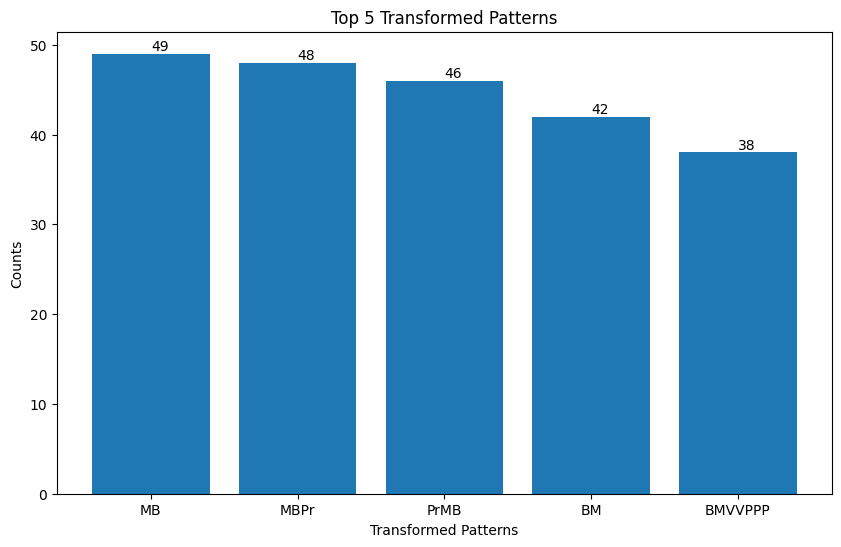

In [46]:
# Get value counts for top 5 patterns found in the data
value_counts = data.transformed_pattern.value_counts().head(5)

# Create bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(value_counts.index, value_counts.values)

# Label the axes
plt.title('Top 5 Transformed Patterns')
plt.xlabel('Transformed Patterns')
plt.ylabel('Counts')

# Label the bars with their respective values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment

# Show the plot
plt.show()

In [52]:
#create new dataframe called sample_pattern_count
sample_pattern_count = pd.DataFrame(data.transformed_pattern.value_counts())

#head of df
sample_pattern_count.head()

,count
transformed_pattern,
MB,49
MBPr,48
PrMB,46
BM,42
BMVVPPP,38


In [55]:
#create new column to include counts of each pattern
sample_pattern_count = pd.DataFrame(data.transformed_pattern.value_counts())


#head df
sample_pattern_count.head()


,count
transformed_pattern,
MB,49
MBPr,48
PrMB,46
BM,42
BMVVPPP,38


### 7. Export to CSV

In [56]:
#Export sample_pattern_count dataframe to csv
sample_pattern_count.to_csv('sample_pattern_count.csv', index=True)

In [114]:
#export file sample_pattern_transformed to csv - this was for another analysis
#data.to_csv('sample_pattern_transformed_data.csv', index=True)